In [23]:
import fastf1.core
# import the dependencies
import pandas as pd
import numpy as np
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [24]:
# Enable cache and setup plotting
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [25]:
# Load the session
race = ff1.get_session(2023, 'Hungary', 'R')
race.load(laps=True, telemetry=True, weather=False, messages=False)

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been writt

['HAM', 'RUS']


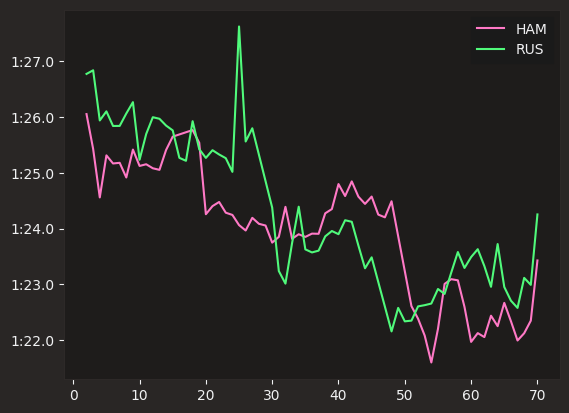

In [76]:
laps = race.laps
drivers = laps['Driver'].unique()
drivers = ['HAM','RUS']
print(drivers)

driver_laps = {driver: laps.pick_driver(driver).pick_wo_box() for driver in drivers}
driver_compounds = {driver: laps['Compound'].unique() for driver in drivers}

driver_laps_compound: dict[str, dict[str, fastf1.core.Laps]] = {driver: {compound: driver_laps[driver].pick_tyre(compound) for compound in driver_compounds[driver]} for driver in drivers} 


driver_lap_times = {driver: [lap['LapTime'] for _, lap in driver_laps[driver].iterlaps()] for driver in drivers}
driver_lap_numbers = {driver: [lap['LapNumber'] for _, lap in driver_laps[driver].iterlaps()] for driver in drivers}
driver_stints = {driver: [lap['Stint'] for _, lap in driver_laps[driver].iterlaps()] for driver in drivers}
driver_compound = {driver: [lap['Compound'] for _, lap in driver_laps[driver].iterlaps()] for driver in drivers}


for driver in drivers:
    plt.plot(driver_lap_numbers[driver], driver_lap_times[driver], label=driver)
    
plt.legend()
plt.show()


HAM MEDIUM
HAM HARD
HAM SOFT
RUS MEDIUM
RUS HARD
RUS SOFT


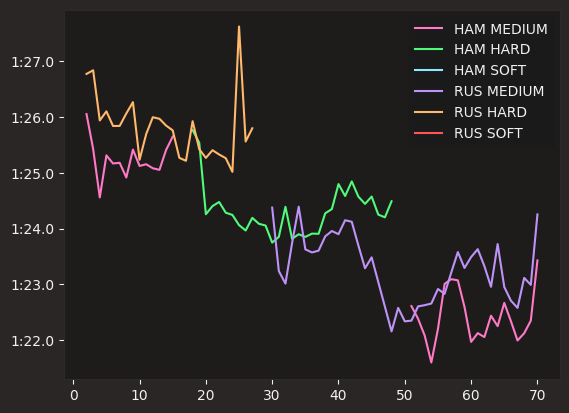

In [78]:


# Plot the lap times
for driver in drivers:
    df = pd.DataFrame()
    lap_numbers = driver_laps[driver]['LapNumber']
    df['laps_num'] = lap_numbers
    for compound in driver_compounds[driver]:
        print(driver, compound)
        laps = driver_laps_compound[driver][compound]
        df['lap_time_' + compound] = laps['LapTime']        
        plt.plot(df['laps_num'], df['lap_time_' + compound], label=driver + ' ' + compound)

plt.legend()
plt.show()
